#### Import Library

In [128]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import Input
from keras.models import Model
from keras.layers import Concatenate
from tensorflow.keras import layers, optimizers, datasets
from keras_preprocessing.image import ImageDataGenerator

import os
import cv2
from sklearn import preprocessing
from pathlib import Path
import splitfolders

import shutil

### Membuat data Validation dari 20% data train

In [89]:
srcPath = 'fingers/train/' 
destPath = 'fingers/validation/' 
files = os.listdir(srcPath)

for file in files[:3600]:
    shutil.move(srcPath + file, destPath + file)

## Augmentasi

In [129]:
train = os.listdir("fingers/train/")
test = os.listdir('fingers/test/')
val = os.listdir('fingers/validation/')

all_train = ['fingers/train/' + i for i in train]
all_test = ['fingers/test/' + i for i in test]
all_val = ['fingers/validation/' + i for i in val]

In [130]:
train_df = pd.DataFrame(all_train, columns=['Filepath'])
test_df = pd.DataFrame(all_test, columns=['Filepath'])

train_df.head()

,Filepath
0,fingers/train/00048bba-979b-4f84-b833-5bbbb082...
1,fingers/train/000547a2-d456-4b16-b351-12ca9b40...
2,fingers/train/000cac8e-fcf0-4f8c-bd16-c257d1e6...
3,fingers/train/000d9961-8136-4dee-9820-86e17877...
4,fingers/train/000e7aa6-100b-4c6b-9ff0-e7a8e53e...


In [131]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=30,
    shear_range=.2,
    zoom_range=.2,
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [132]:
train_generator = train_datagen.flow_from_directory(
    train_df,
    target_size=(50, 50),
    shuffle=True,
    batch_size=4,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_df,
    target_size=(50, 50),
    shuffle=True,
    batch_size=2,
    class_mode='categorical'
)

# val_generator = val_datagen.flow_from_directory(
#     val,
#     target_size=(50, 50),
#     shuffle=True,
#     batch_size=2,
#     class_mode='categorical'
# )

TypeError: listdir: path should be string, bytes, os.PathLike or None, not DataFrame

In [68]:
image,label= train_generator.next()

### Reading Data 

In [90]:
# Membaca Data Train Gambar
train_path = []
label_train = []

path_train = "fingers/train/"

for filename in os.listdir(path_train):
    
    train_path.append(path_train+filename)
    whole_label = filename.split('_')[1]
    useful_label = whole_label.split('.')[0]
    label_train.append(useful_label)

print("Jumlah Gambar Data Train: ", len(train_path))
print("6 Label Pertama: ", label_train[:6])

Jumlah Gambar Data Train:  16400
6 Label Pertama:  ['0L', '0L', '2L', '0L', '5L', '5L']


In [91]:
# Membaca Data Test Gambar 
test_path = []
label_test = []

path_test = "fingers/test/"

for filename in os.listdir(path_test):
    
    test_path.append(path_test+filename)
    whole_label = filename.split('_')[1]
    useful_label = whole_label.split('.')[0]
    label_test.append(useful_label)

print("Jumlah Gambar Data Test: ", len(test_path))
print("6 Label Pertama: ", label_test[:6])

Jumlah Gambar Data Test:  1800
6 Label Pertama:  ['2R', '4R', '3L', '1R', '5L', '4L']


In [92]:
# Membaca Data Validation Gambar 
val_path = []
label_val = []

path_val = "fingers/validation/"

for filename in os.listdir(path_val):
    
    val_path.append(path_val+filename)
    whole_label = filename.split('_')[1]
    useful_label = whole_label.split('.')[0]
    label_val.append(useful_label)

print("Jumlah Gambar Data Validation: ", len(val_path))
print("6 Label Pertama: ", label_val[:6])

Jumlah Gambar Data Validation:  3400
6 Label Pertama:  ['2R', '3R', '1L', '0R', '5R', '5R']


### Visualisasi Data Gambar 

In [39]:
train_path[0]

'fingers/train/00048bba-979b-4f84-b833-5bbbb082b582_0L.png'

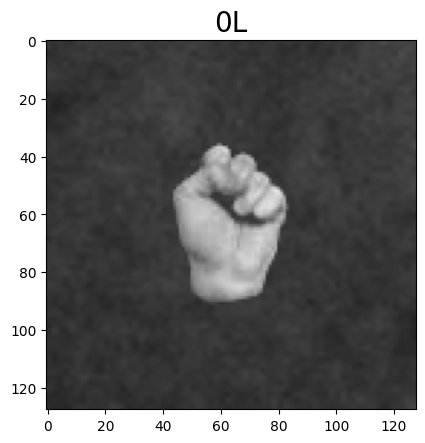

In [40]:
# cek Path Data Train
image = cv2.imread(train_path[0]) 

# the first image bleongs to clean directory under train
plt.imshow(image)
plt.title(label_train[0], fontsize = 20)
plt.axis('on')
plt.show()

In [41]:
test_path[100]

'fingers/test/87bdc42d-9525-4582-b579-187c0da9491b_3L.png'

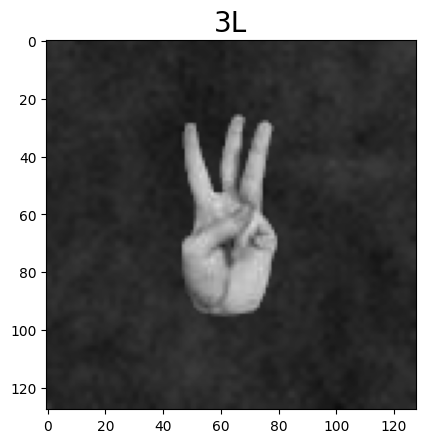

In [42]:
# cek Path Data Test
image = cv2.imread(test_path[100]) 

# the first image bleongs to clean directory under train
plt.imshow(image)
plt.title(label_test[100], fontsize = 20)
plt.axis('on')
plt.show()

In [43]:
val_path[200]

'fingers/validation/2b9e6f34-a945-4743-83dc-eaa71ee714b4_5R.png'

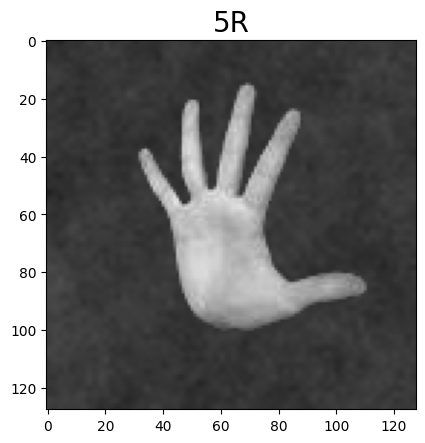

In [44]:
# cek Path Data Validation
image = cv2.imread(val_path[200]) 

plt.imshow(image)
plt.title(label_val[200], fontsize = 20)
plt.axis('on')
plt.show()

### Data Preprocessing

- Membuat Data Train, Test, dan Validation

In [45]:
X_train = []
X_test = []
X_val = []

# membaca data gambar train data
for path in train_path:
    
    image = cv2.imread(path)        
    image =  cv2.resize(image, (50,50))    
    X_train.append(image)
    
# membaca data gambar test data
for path in test_path:
    
    image = cv2.imread(path)        
    image =  cv2.resize(image, (50,50))    
    X_test.append(image)
    
# membaca data gambar val data
for path in val_path:
    
    image = cv2.imread(path)        
    image =  cv2.resize(image, (50,50))    
    X_val.append(image)


X_test = np.array(X_test)
X_train = np.array(X_train)
X_val = np.array(X_val)

In [46]:
# Display Dimensi
print("Bentuk X_train: ", X_train.shape)
print("Bentuk X_test: ", X_test.shape)
print("Bentuk X_val: ", X_val.shape)


Bentuk X_train:  (14400, 50, 50, 3)
Bentuk X_test:  (1800, 50, 50, 3)
Bentuk X_val:  (5400, 50, 50, 3)


In [47]:
# Normalisasi Pixel Gambar agar mendapatkan range 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_test /= 255
X_val /= 255

In [48]:
# Encoding Label dan menkonversi ke nilai kategorikal
lable_encoder = preprocessing.LabelEncoder()
y_train_temp = lable_encoder.fit_transform(label_train)
y_test_temp = lable_encoder.fit_transform(label_test)
y_val_temp = lable_encoder.fit_transform(label_val)


print("Nilai Encoding train: ", y_train_temp)
print("Nilai Encoding test: ", y_test_temp)
print("Nilai Encoding val: ", y_val_temp)

Nilai Encoding train:  [0 0 4 ... 1 4 4]
Nilai Encoding test:  [5 9 6 ... 9 7 7]
Nilai Encoding val:  [ 2  0 10 ... 10  5  6]


In [49]:
# Encoding data menggunakan keras utils
y_train = keras.utils.to_categorical(y_train_temp, 12)
y_test = keras.utils.to_categorical(y_test_temp, 12)
y_val = keras.utils.to_categorical(y_val_temp, 12)


print("Nilai Categorical y_train:", y_train,"\n")
print("Nilia Ctegorical  y_test:", y_test, "\n")
print("Nilia Ctegorical  y_val:", y_val, "\n")

Nilai Categorical y_train: [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

Nilia Ctegorical  y_test: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

Nilia Ctegorical  y_val: [[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 



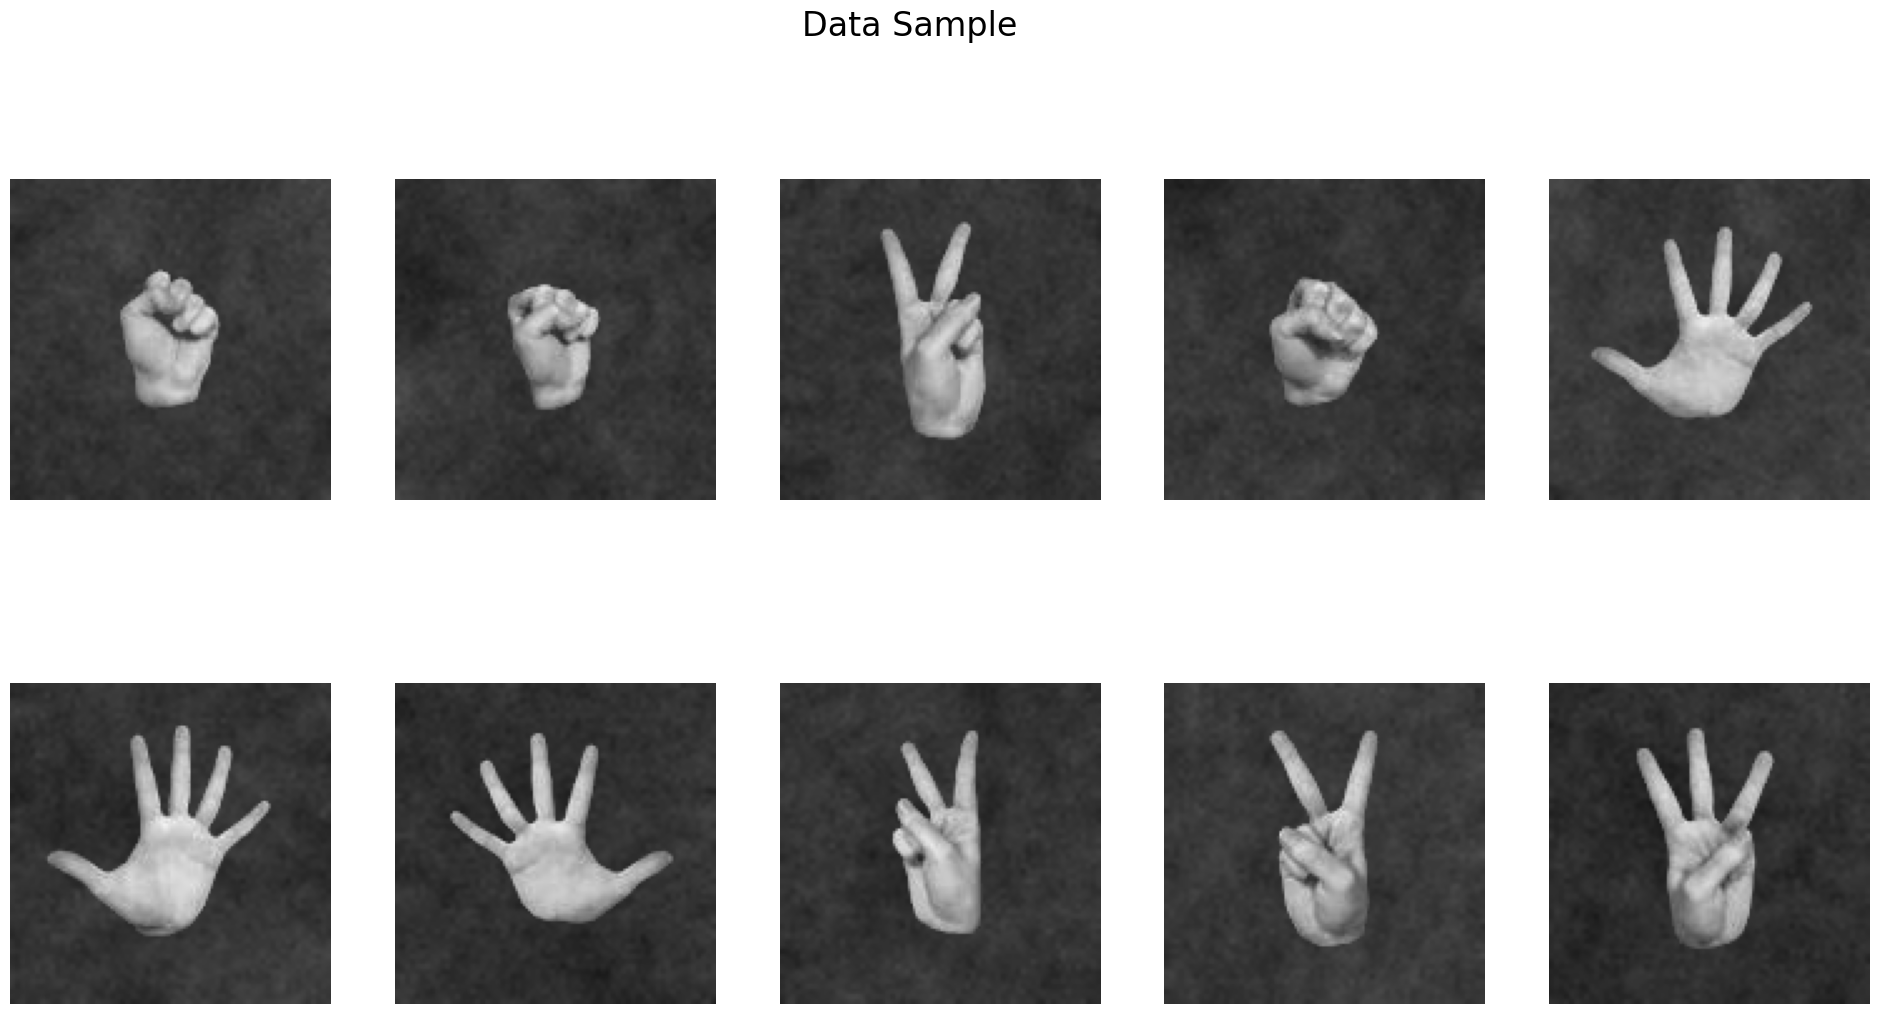

In [50]:
# Visualisasi Data Sample
fig, axs= plt.subplots(2,5, figsize=[24,12])


count=0
for i in range(2):    
    for j in range(5):  
        
        img = cv2.imread(train_path[count])
    
        axs[i][j].imshow(img)
        axs[i][j].axis('off')

        count+=1
        
plt.suptitle("Data Sample", fontsize = 24)        
plt.show()

### Membuat Sequential Model

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', input_shape=(50, 50, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(12, activation='softmax')
])

In [57]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 50, 50, 128)       3584      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 25, 25, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 23, 23, 128)       147584    
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 11, 11, 128)      0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 11, 11, 128)       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 11, 11, 64)       

In [59]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    shuffle=True,
    
    validation_data=(X_val, y_val)
    # modul 8
)

Epoch 1/10
113/113 [==============================] - 77s 677ms/step - loss: 0.2181 - accuracy: 0.9276 - val_loss: 0.0159 - val_accuracy: 0.9963
Epoch 2/10
113/113 [==============================] - 80s 712ms/step - loss: 0.0651 - accuracy: 0.9783 - val_loss: 0.0067 - val_accuracy: 0.9978
Epoch 3/10
113/113 [==============================] - 82s 727ms/step - loss: 0.0364 - accuracy: 0.9869 - val_loss: 0.0012 - val_accuracy: 0.9996
Epoch 4/10
113/113 [==============================] - 78s 690ms/step - loss: 0.0264 - accuracy: 0.9905 - val_loss: 7.3259e-04 - val_accuracy: 1.0000
Epoch 5/10
113/113 [==============================] - 80s 711ms/step - loss: 0.0214 - accuracy: 0.9928 - val_loss: 3.7740e-04 - val_accuracy: 1.0000
Epoch 6/10
113/113 [==============================] - 80s 711ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 9.5298e-05 - val_accuracy: 1.0000
Epoch 7/10
113/113 [==============================] - 81s 715ms/step - loss: 0.0152 - accuracy: 0.9951 - val_loss: 1.5